# Diffusion of a Gaussian profile on a rectangle

$$
\mathbb{S}=
\begin{cases}
\Omega = [0, L_x] \times [0, L_y] \\
u_{\text{D}}(x,y=0) \\ 
u_{\text{D}}(x,y=L_y)=0 \\
u_{\text{N}}(x=0,y) \\ 
u_{\text{N}}(x=L_x,y)=0 \\
\mathsf{D}=D\mathsf{I} \\
\end{cases}
$$

In [ ]:
import numpy as np

from lucifex.mesh import rectangle_mesh, mesh_boundary
from lucifex.fdm import BE, FunctionSeries
from lucifex.fem import Constant
from lucifex.solver import ibvp, BoundaryConditions
from lucifex.viz import plot_colormap, plot_line
from lucifex.utils import cross_section
from lucifex.io import write, get_ipynb_file_name
from lucifex.pde.diffusion import diffusion

Lx = 2.0
Ly = 1.0
mesh = rectangle_mesh(Lx, Ly, 100, 100)
boundary = mesh_boundary(
    mesh, 
    {
        "left": lambda x: x[0],
        "right": lambda x: x[0] - Lx,
        "lower": lambda x: x[1],
        "upper": lambda x: x[1] - Ly,
    },
)

dt = Constant(mesh, 0.01, name='dt')
d = Constant(mesh, 0.1, name='d')

ics = lambda x: np.exp(-((x[0] - Lx/2)**2 + (x[1] - Ly/2)**2)/ (0.01 * Lx))
bcs_D = BoundaryConditions(
    ("dirichlet", boundary['lower', 'upper'], 0.0),  
)
bcs_N =  BoundaryConditions(
    ("neumann", boundary['left', 'right'], 0.0), 
)
u = FunctionSeries((mesh, 'P', 1), name='u', store=1)
u_solver = ibvp(diffusion, ics, bcs_D)(u, dt, d, BE, bcs_N)

In [6]:
t = 0.0
t_stop = 10.0
n = 0
n_stop = 10

while n < n_stop and t < t_stop:
    u_solver.solve()
    u.forward(t)
    t += dt.value
    n += 1

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='$y$', ylabel='$u(x=0.50)$'>)

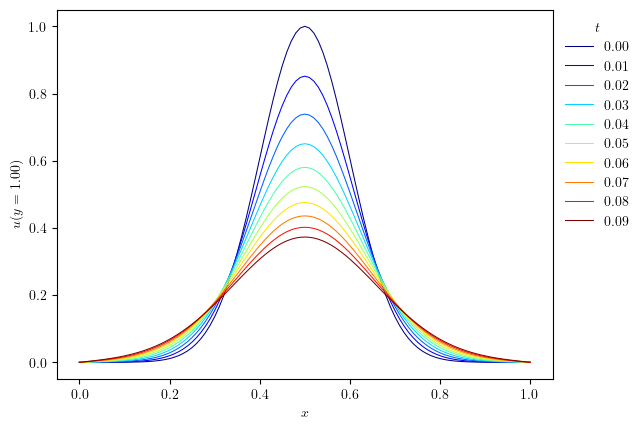

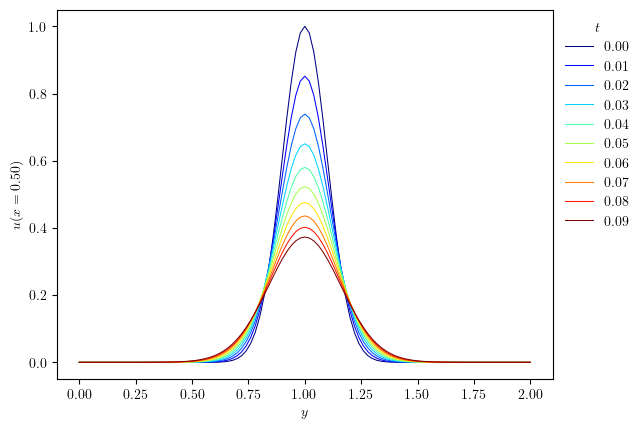

In [ ]:
slc = slice(0, None)
x_lines, y_lines = [], []

for ui in u.series[slc]:
    x_axis, x_line, y_value = cross_section(ui, 'x', 0.5)
    x_lines.append((x_axis, x_line))
    y_axis, y_line, x_value = cross_section(ui, 'y', 0.5)
    y_lines.append((y_axis, y_line))

legend_labels = [f'{time:.2f}' for time in u.time_series[slc]]
plot_line(x_lines, legend_labels, 't', cyc='jet', x_label='$x$', y_label=f'{u.name}(y={y_value:.2f})')
plot_line(y_lines, legend_labels, 't', cyc='jet', x_label='$y$', y_label=f'{u.name}(x={x_value:.2f})')

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': '$u(t=0.09)$'}, xlabel='$x$', ylabel='$y$'>)

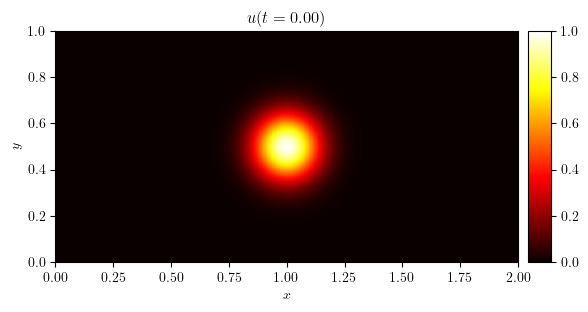

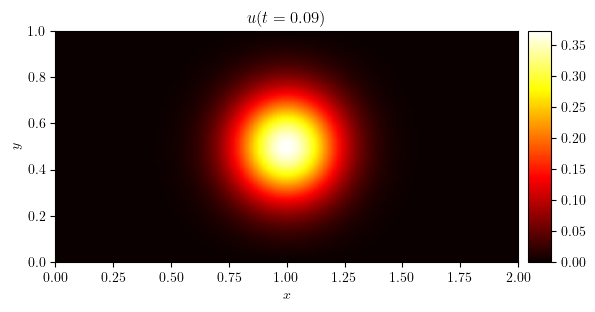

In [ ]:
fig, ax = plot_colormap(u.series[0], title=f'{u.name}(t={u.time_series[0]:.2f})')
write(fig, f'{get_ipynb_file_name()}_u(t={u.time_series[0]:.2f})', './figures', close=False, pickle=False)
fig, ax = plot_colormap(u.series[-1], title=f'{u.name}(t={u.time_series[-1]:.2f})')
write(fig, f'{get_ipynb_file_name()}_u(t={u.time_series[-1]:.2f})', './figures', close=False, pickle=False)